Занять в начальный момент времени один из центральных узлов двумерной решетки размерностью 8х8 в качестве зародыша  кластера. На каждом из последующих временных шагов занимать случайным образом один узел решетки, принадлежащий периметру. Написать программу, моделирующую рост кластера в зависимости от «времени». Построить рисунки, отображающие состояние кластера, для 32 последовательных моментов времени. Рассчитать фрактальную размерность полученного кластера.


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

In [74]:
def fill(cluster, perimeter, cell_x, cell_y, iteration, t):
    n = cluster.shape[0]    
    
    if (iteration >= t):        
        return
      
    iteration+=1    

    if ((cell_x == n-1) or (cell_x == 0) or (cell_y == n-1) or (cell_y == 0)):    
        iteration-=1 
        cluster[cell_x, cell_y] = 99 
        #perimeter.append([cell_x, cell_y]) 
    else:  
        
        for dir in range(4):  #build perimeter          
            if (dir == 0):
                if (cluster[cell_x + 1, cell_y] == 0):                    
                    perimeter.append([cell_x + 1, cell_y])
                    cluster[cell_x + 1, cell_y] = 99                    
            elif (dir == 1):
                if (cluster[cell_x, cell_y + 1] == 0):
                    perimeter.append([cell_x, cell_y + 1])    
                    cluster[cell_x, cell_y + 1] = 99                
            elif (dir == 2):
                if (cluster[cell_x - 1, cell_y] == 0):
                    perimeter.append([cell_x - 1, cell_y])   
                    cluster[cell_x - 1, cell_y] = 99                 
            elif (dir == 3):
                if (cluster[cell_x, cell_y - 1] == 0):
                    perimeter.append([cell_x, cell_y - 1])  
                    cluster[cell_x, cell_y - 1] = 99 

        cluster[cell_x,cell_y] = iteration        
        if perimeter.count([cell_x, cell_y]):
            perimeter.remove([cell_x, cell_y])  

        plt.figure()
        plt.imshow(cluster)            
        print('t = ', iteration, '\n',cluster, '\n')          
                    
    next = np.random.randint(len(perimeter))
    next_val = perimeter[next]    
    fill(cluster, perimeter, next_val[0], next_val[1], iteration, t)        


In [75]:
def calc_fract(cluster):
    n = cluster.shape[0]
    l = 1/n
    M = 0
    for i in range(n):
        for j in range(n):
            if (cluster[i,j] > 0) and (cluster[i,j] < 99) :
                M += 1                
    d =  log(M)/log(1/l)
    return d

In [76]:
def main():
    seed = [4,4]
    cluster = np.zeros((8,8))      
    perimeter = []

    fill(cluster, perimeter, seed[0], seed[1], 0, 32)

    return cluster, calc_fract(cluster)

t =  1 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 99.  0.  0.  0.]
 [ 0.  0.  0. 99.  1. 99.  0.  0.]
 [ 0.  0.  0.  0. 99.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]] 

t =  2 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 99.  0.  0.  0.]
 [ 0.  0.  0. 99.  2. 99.  0.  0.]
 [ 0.  0.  0. 99.  1. 99.  0.  0.]
 [ 0.  0.  0.  0. 99.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]] 

t =  3 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 99.  0.  0.  0.]
 [ 0.  0.  0. 99.  2. 99.  0.  0.]
 [ 0.  0.  0. 99.  1.  3. 99.  0.]
 [ 0.  0.  0.  0. 99. 99.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]] 

t =  4 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 99.  0.  0.  0.]
 [ 0.  0.  0. 99.  4. 99.  0.  0.]
 [ 0.  0. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


t =  24 
 [[ 0.  0.  0.  0. 99. 99. 99.  0.]
 [ 0.  0.  0. 99.  8.  6.  9. 99.]
 [ 0.  0.  0. 99.  4.  5. 14. 99.]
 [ 0. 99. 99. 22.  2. 17. 99.  0.]
 [99. 13. 12.  7.  1.  3. 20. 99.]
 [99. 23. 15. 16. 10. 11. 21. 99.]
 [99. 24. 99. 99. 99. 18. 19. 99.]
 [ 0. 99.  0.  0.  0. 99. 99.  0.]] 

t =  25 
 [[ 0.  0.  0.  0. 99. 99. 99.  0.]
 [ 0.  0.  0. 99.  8.  6.  9. 99.]
 [ 0.  0.  0. 99.  4.  5. 14. 99.]
 [ 0. 99. 99. 22.  2. 17. 25. 99.]
 [99. 13. 12.  7.  1.  3. 20. 99.]
 [99. 23. 15. 16. 10. 11. 21. 99.]
 [99. 24. 99. 99. 99. 18. 19. 99.]
 [ 0. 99.  0.  0.  0. 99. 99.  0.]] 

t =  26 
 [[ 0.  0.  0.  0. 99. 99. 99.  0.]
 [ 0.  0.  0. 99.  8.  6.  9. 99.]
 [ 0.  0.  0. 99.  4.  5. 14. 99.]
 [ 0. 99. 99. 22.  2. 17. 25. 99.]
 [99. 13. 12.  7.  1.  3. 20. 99.]
 [99. 23. 15. 16. 10. 11. 21. 99.]
 [99. 24. 99. 99. 26. 18. 19. 99.]
 [ 0. 99.  0.  0. 99. 99. 99.  0.]] 

t =  27 
 [[ 0.  0.  0. 99. 99. 99. 99.  0.]
 [ 0.  0. 99. 27.  8.  6.  9. 99.]
 [ 0.  0.  0. 99.  4.  5. 14. 99.]
 [ 0. 

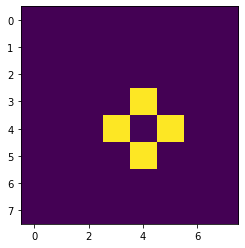

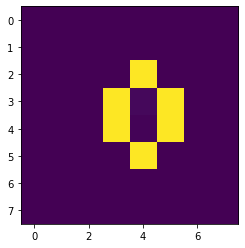

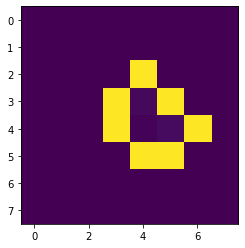

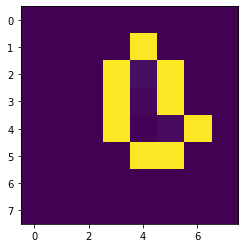

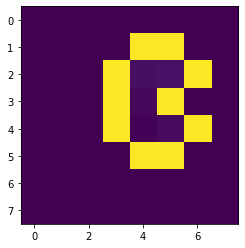

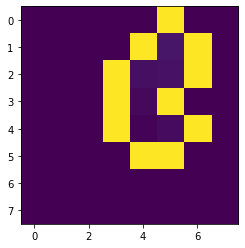

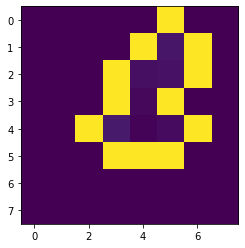

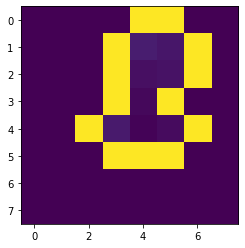

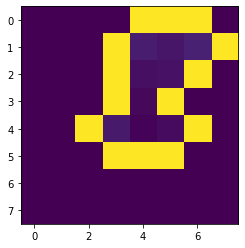

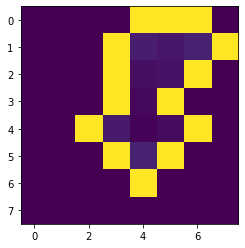

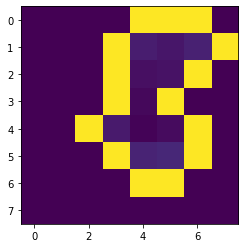

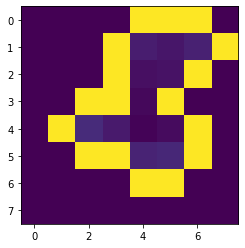

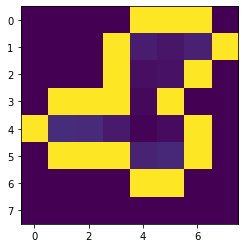

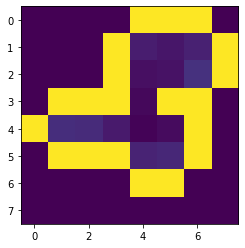

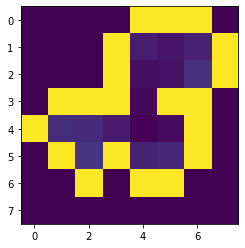

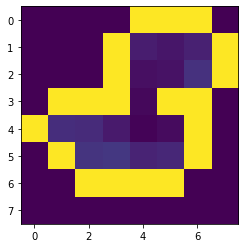

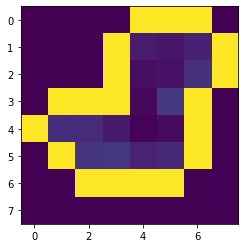

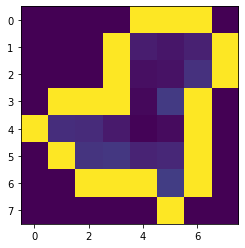

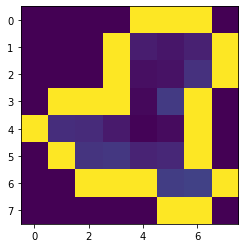

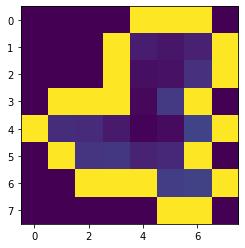

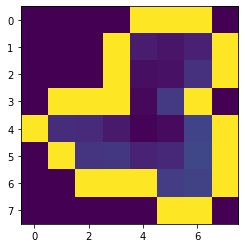

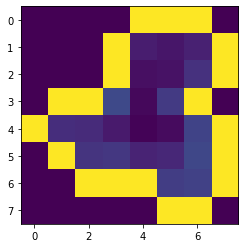

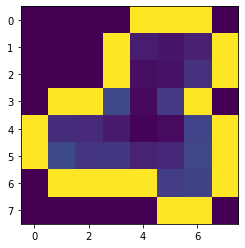

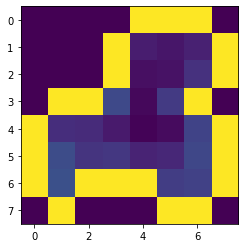

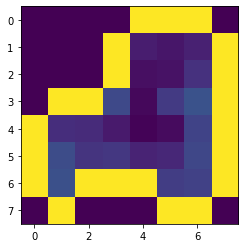

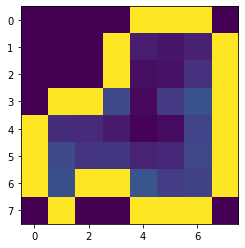

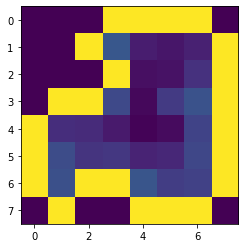

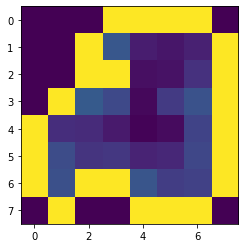

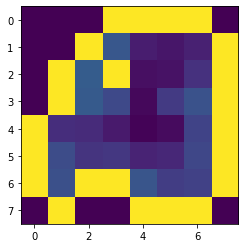

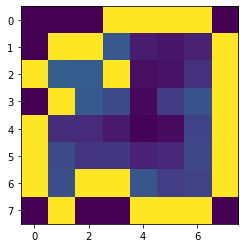

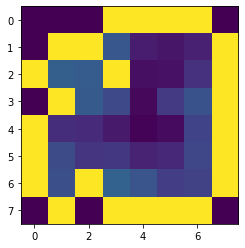

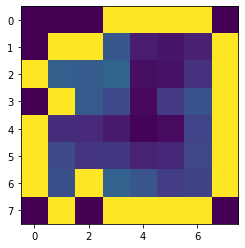

In [77]:
result = main()

result cluster


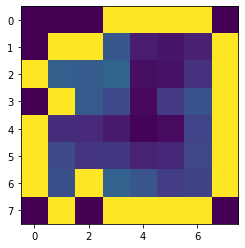

In [78]:
print('result cluster')
plt.imshow(result[0])

In [79]:
print('фрактальная размерность l =',result[1])

фрактальная размерность l = 1.6666666666666667
